# NAME : Fatima A Mamtaz
# REG No: 47998296


# Mobile Price Dataset
## AIM:
In this Project, on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc, we want to predict the price range of the mobile.

## DATA description:
Input variables:

* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not

Output variables:
* price_range: the target value we want to estimate. There are four possible values:0,1,2,3.
### Note that the price range has only four possible values. Thus, this is a classification problem

## Library

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

## 1. Data loading
* We print the table head of the source data to check what kind of feature data has been included.
* Note that column 'index' is not regarded as a meaningful feature here.

In [66]:
data = pd.read_csv("data.csv").reset_index()
print("data shape is : ", data.shape)
data.head()

* It shows that there are 2,000 samples and each sample has 20 features and 1 target ('price_range')

* We further observe the statistical features of the source data by showing the mean, std, min, max, etc., statistical information as below

In [67]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.505250,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.314272,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,5.600000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* We also plot the feature distribution to observe the value distribution of each feature.

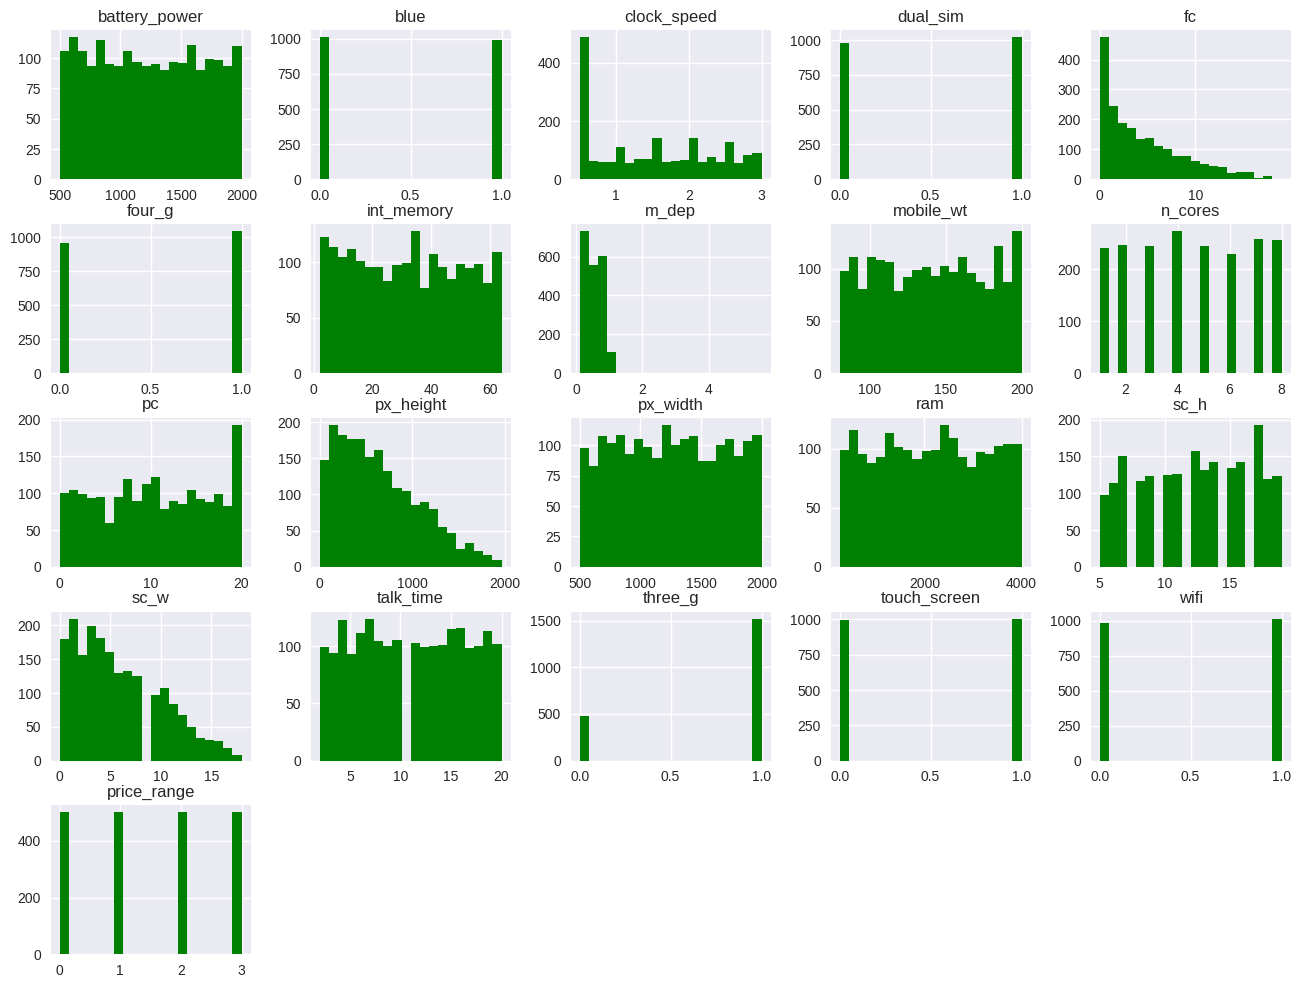

In [68]:
data.hist(bins=20 ,figsize=(16,12), color = 'Green')
plt.show()

* In particular, we plot the distribution of the target variable: Price range

Text(0.5, 1.0, 'Price Class Distribution \n (0: Range one || 1: Range two||2:Range three||3:Range Four)')

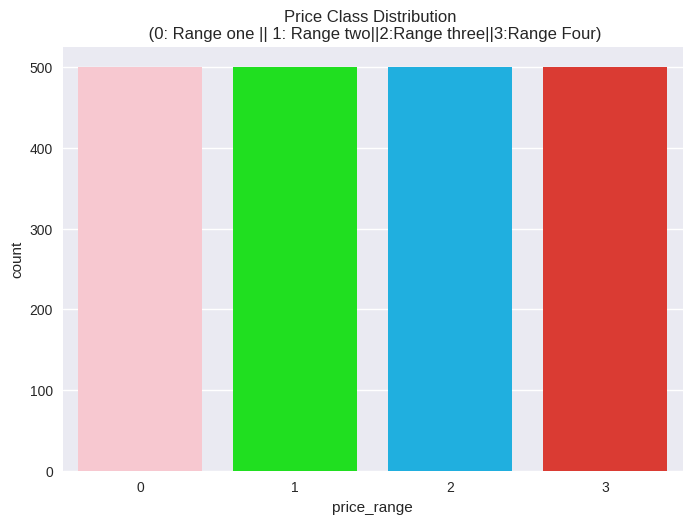

In [69]:
colors = ["#FFC0CB","#00FF00","#00BFFF","#F62217"]
sns.countplot(x='price_range',data=data, palette = colors)
plt.title('Price Class Distribution \n (0: Range one || 1: Range two||2:Range three||3:Range Four)',
          fontsize=12)

* There are four possible values of the price range with 0, 1, 2 and 3. From the distribution, we can find that the label idstribution is very balanced and even among four possible labels.

## Feature Selection

We first study the correlation between the mobile price range and other features.

In [70]:
data = data.drop(columns=['index'])
# We drop the 'index' column here since it's meaningless for prediction
correlation_matrix = data.corr()
print(correlation_matrix['price_range'])

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.001495
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64


# the least relevant featurs comes from absolute values


In [71]:
print(correlation_matrix['price_range'].abs().sort_values(ascending=False))


price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.001495
Name: price_range, dtype: float64


Then we remove irrelevant features.

In [72]:
data = data.drop(columns=['clock_speed','n_cores','m_dep'])

In [73]:
data.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0,1


## 2. Data Preprocessing

### 2.1 Data Normalisetion & Train Test Split

* The cleaned normalised dataset is split into train dataset and the test dataset and we need to randomly shuffle the data set

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.copy().drop(columns=['price_range'])
scaler = StandardScaler()
df_standardized = scaler.fit_transform(X)
df_standardized = pd.DataFrame(df_standardized, columns=X.columns)

In [75]:
# df_standardized.head()

In [76]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
x_ex1 = df_standardized
y_ex1 = data.copy()['price_range']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.75),:]
x_test = x_ex1_array[int((len(y_ex1_array)+1)*0.75):,:]
y_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.75)]
y_test = y_ex1_array[int((len(y_ex1_array)+1)*0.75):]

## 3. Neural Network
* We will train a neural network model to predict the price range target variable based on the cleaned and normalised  dataset.

### 3.1 Model generation

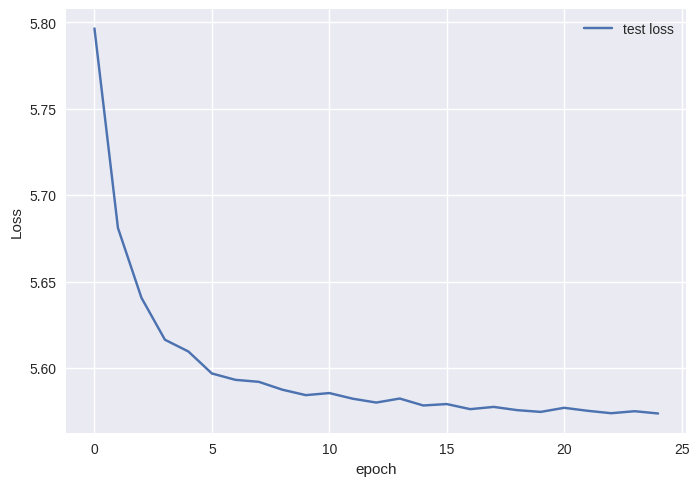

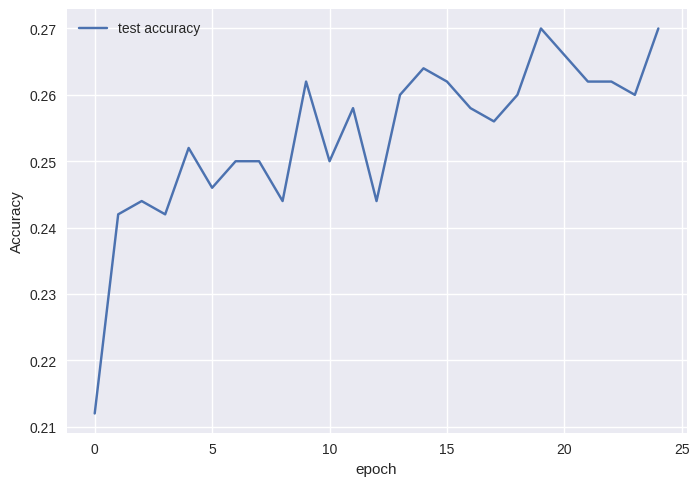

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.base import clone
from sklearn.metrics import log_loss


def my_logloss(true_label, predicted):
    b = np.zeros((true_label.size,true_label.max()+1))
    b[:,true_label] = 1
    N = predicted.shape[0]
    ce = -np.sum(b * np.log(predicted)) / N
    return ce

mlp = MLPClassifier(
    solver='sgd',
    activation='identity',
    random_state=42,
    hidden_layer_sizes=(20,10,5),
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=1,
)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = x_train.shape[0]
N_EPOCHS = 25
N_BATCH = 20
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
train_loss = []
test_loss = []

# epoch
epoch = 0
while epoch < N_EPOCHS:
    # shuffing
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    while True:
        # mini-batch
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(x_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

     # test record
    scores_test.append(mlp.score(x_test, y_test))
    y_pred = mlp.predict_proba(x_test)
    test_error = my_logloss(y_test, y_pred)
    test_loss.append(test_error)

    epoch += 1
# plot
plt.plot(test_loss,label='test loss')
plt.legend([ 'test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

# plot
plt.plot(scores_test,label='test accuracy')
plt.legend([ 'test accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()


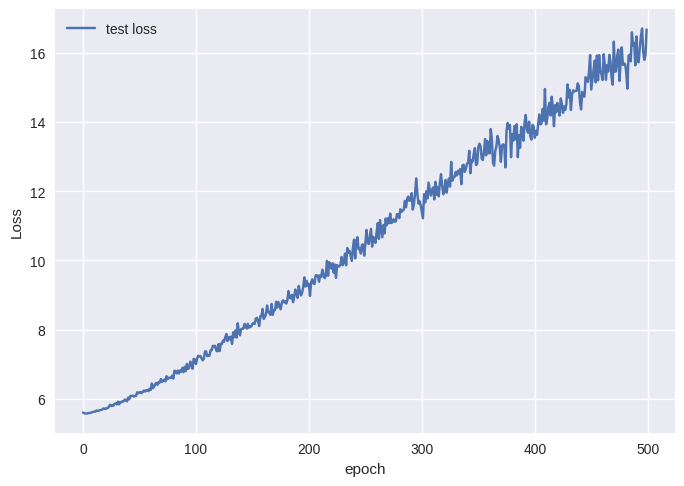

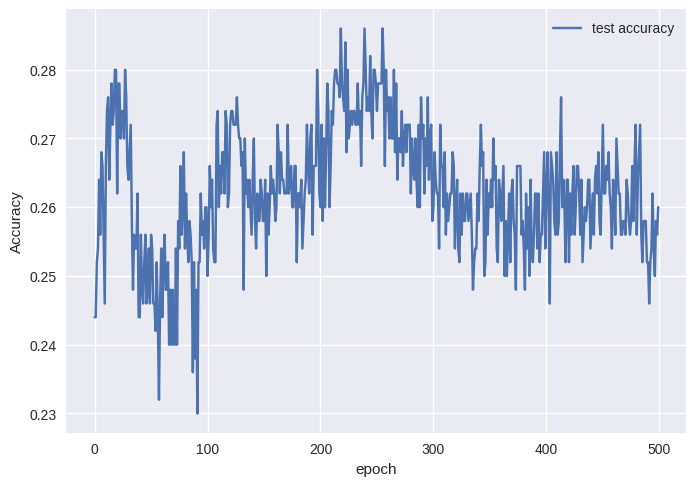

In [78]:
# my version:

mlp = MLPClassifier(
    solver='adam',
    activation='relu',
    random_state=42,
    hidden_layer_sizes=(20,10,5),
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=500,
)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = x_train.shape[0]
N_EPOCHS = 500
N_BATCH = 20
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []
train_loss = []
test_loss = []

# epoch
epoch = 0
while epoch < N_EPOCHS:
    # shuffing
    random_perm = np.random.permutation(x_train.shape[0])
    mini_batch_index = 0
    while True:
        # mini-batch
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(x_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

     # test record
    scores_test.append(mlp.score(x_test, y_test))
    y_pred = mlp.predict_proba(x_test)
    test_error = my_logloss(y_test, y_pred)
    test_loss.append(test_error)

    epoch += 1
# plot
plt.plot(test_loss,label='test loss')
plt.legend([ 'test loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

# plot
plt.plot(scores_test,label='test accuracy')
plt.legend([ 'test accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()


In [79]:
# The main changes in my network models are:

# Solver : `sgd` -> `adam`
# Activation function : `identity` -> `relu`
#      The first model uses the `identity` activation function, while the second model uses the `relu` activation function.
#      The `relu` activation function is generally more effective for training neural networks, as it introduces non-linearity and helps the network learn more complex relationships in the data.
#  Number of epochs:
# Number of epochs : 25 -> 500
#      The first model is trained for only 1 epoch, while the second model is trained for 500 epochs.
#      Training for more epochs allows the network to learn more about the data and improve its performance.
#  Learning rate:
#      The first model uses a constant learning rate of 0.001, while the second model uses the `adam` optimizer, which automatically adjusts the learning rate during training.
#      Using an adaptive learning rate optimizer can help the network converge more quickly and efficiently.
# Test accuracy : Lower -> Higher

* We firstly use the test loss and  accuracy to evaluate the performance of the trained neural network model.
* From evaluation results, we can observe that:
1) The model performance is not stable.
2) As the number of iterations increases, the loss continues to decrease, but the accuracy is fluctuated.

### 3.2 Model evaluation
* We further evaluate the model performance by using more metrics such as precision, recall and f1-score

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = mlp.predict(x_test)
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.29      0.14      0.19       123
           1       0.27      0.24      0.25       127
           2       0.25      0.18      0.21       125
           3       0.25      0.48      0.33       125

    accuracy                           0.26       500
   macro avg       0.27      0.26      0.25       500
weighted avg       0.27      0.26      0.25       500



[[17 26 20 60]
 [12 30 22 63]
 [16 31 23 55]
 [14 24 27 60]]


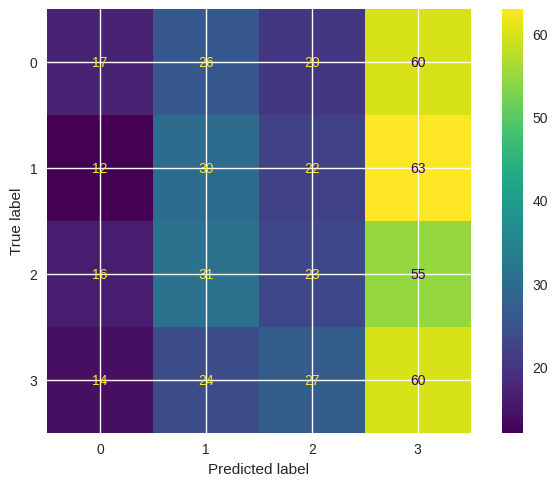

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=mlp.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=mlp.classes_)
disp.plot()
plt.show()

## 4. Decision Tree
* Now, we train the second model, decision tree model, to predict the mobile price range, to see which model can provide better performance.

### 4.1 Model generation

In [125]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
)
tree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=5)

### 4.2 Test

[[33 30 30 30]
 [23 38 34 32]
 [27 37 34 27]
 [26 40 26 33]]


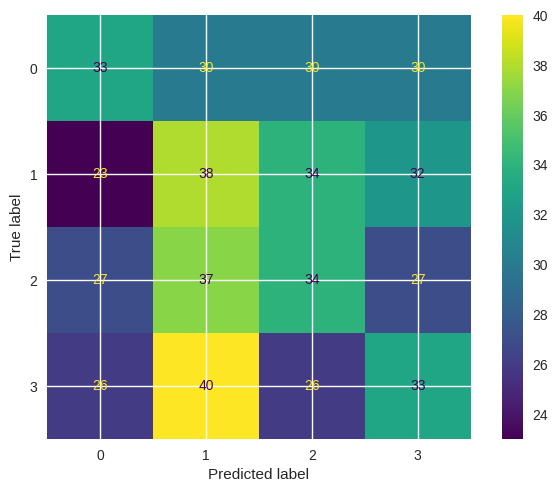

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=tree.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

In [127]:
from sklearn.metrics import classification_report

tree.fit(x_train,y_train)
y_true, y_pred = y_test , tree.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.26      0.31      0.28       123
           1       0.29      0.22      0.25       127
           2       0.19      0.22      0.20       125
           3       0.29      0.28      0.29       125

    accuracy                           0.26       500
   macro avg       0.26      0.26      0.26       500
weighted avg       0.26      0.26      0.26       500



* From the evaluation result of the decision tree model, its accuracy (27%) is slighlt better than that of the neural network model (23%).

# my version

In [128]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=15,
    min_samples_leaf=10,
)
tree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=15)

increasing min_samples_split and min_samples_leaf helps to create a decision tree that is less prone to overfitting, more stable, and better at generalizing to new data, which is particularly important for datasets of moderate size, such as one with 2000 records.

[[38 19 39 27]
 [29 28 36 34]
 [47 27 27 24]
 [31 22 37 35]]


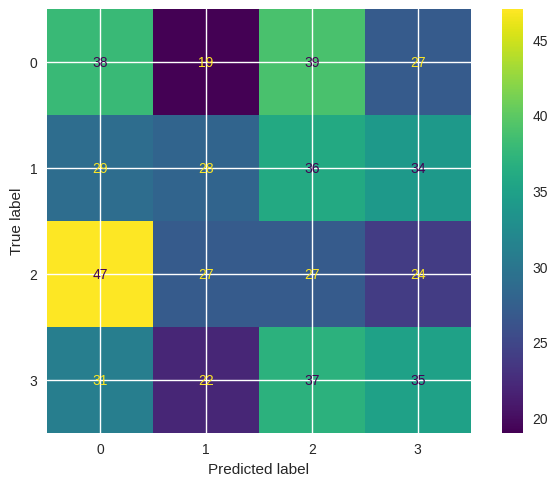

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( y_test, y_pred, labels=tree.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

In [130]:
from sklearn.metrics import classification_report

tree.fit(x_train,y_train)
y_true, y_pred = y_test , tree.predict(x_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.30      0.27      0.28       123
           1       0.26      0.30      0.28       127
           2       0.27      0.27      0.27       125
           3       0.27      0.26      0.27       125

    accuracy                           0.28       500
   macro avg       0.28      0.28      0.28       500
weighted avg       0.28      0.28      0.28       500



* From the evaluation result of the neural network model, its accuracy (29%) is slighlt better than that of the decision tree model (28%).

### 4.3 Further exploration

Since these two models have a similar accuracy score on the test set, so we want to use another metric to compare them.

In [131]:
# In here, we use MSE to evaluate these two models
from sklearn.metrics import mean_squared_error

# NN's prediction
nn_test = mlp.predict(x_test)
nn_mse = mean_squared_error(y_test, nn_test)
print(f"Neural Network's Mean Squared Error: {nn_mse}")

# DT's prediction
dt_test = tree.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_test)
print(f"Decision Tree's Mean Squared Error: {dt_mse}")

Neural Network's Mean Squared Error: 2.662
Decision Tree's Mean Squared Error: 2.394


* These two model's performance under MSE are quite similar and the gap is really small.
* From our comparison, we can assert that decision tree model is better and more powerful than that of the neural network model because decision tree achieves a higher model accuracy.